In [1]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(1, '../../')

In [2]:
from src.utils.data_utils import EcgDataModule
ecg_data_module = EcgDataModule()
train_ds, val_ds, test_ds = ecg_data_module.load_ds_with_feat()

In [ ]:
val_ds.signals[0].R_AMP_V1

In [7]:
print(train_ds.count_diagnoses())
print(val_ds.count_diagnoses())
print(test_ds.count_diagnoses())
print(train_ds.count_diagnoses().sum())
print(val_ds.count_diagnoses().sum())
print(test_ds.count_diagnoses().sum())

tensor([4896.,  580.,   12.,  383.,  279., 8070.,  276.,  305.,  297.,  703.,
          82.,   61.,  678.,   16.,  155.,  721.,   41.,   41., 1185., 1493.,
         473.])
tensor([1632.,  208.,    3.,  127.,   97., 2684.,   98.,   97.,  110.,  234.,
          23.,   18.,  226.,    3.,   50.,  230.,   15.,   16.,  392.,  488.,
         180.])
tensor([1.6250e+03, 1.9900e+02, 2.0000e+00, 1.3100e+02, 9.8000e+01, 2.7340e+03,
        9.7000e+01, 1.1000e+02, 1.1300e+02, 2.3300e+02, 3.8000e+01, 2.2000e+01,
        2.3600e+02, 6.0000e+00, 6.0000e+01, 2.5300e+02, 1.8000e+01, 1.3000e+01,
        4.1500e+02, 4.9600e+02, 1.6600e+02])
tensor(20747.)
tensor(6931.)
tensor(7065.)


In [6]:
feat_vec = train_ds.signals[0].get_feat()
print(feat_vec)
len(feat_vec)

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0168e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.8773e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.2529e-01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1727e+02, 1.5161e+02])


22

In [7]:
from src.basic.dx_and_feat import get_feat_by_str
get_feat_by_str(torch.unsqueeze(feat_vec, 0), ['QRS_DUR'])

tensor([151.6111])

In [11]:
train_ds.signals[0].str_diagnoses

['NORM', 'SR']

In [10]:
train_ds.signals[0].get_diagnoses()

tensor([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])

In [3]:
ecg_data_module.setup('test')
test_ds = ecg_data_module.test_ds
print(len(test_ds))

test dataset loaded!
3438


In [4]:
ecg_data_module.setup(stage='fit')
train_ds, val_ds = ecg_data_module.train_ds, ecg_data_module.val_ds
print(len(train_ds), len(val_ds))

train dataset loaded!
val dataset loaded!
10077 3369


In [5]:
print([len(ecg.all_cycles[0]) for ecg in val_ds.signals if len(ecg.all_cycles[0]) < 3])

[2, 2, 2, 1]


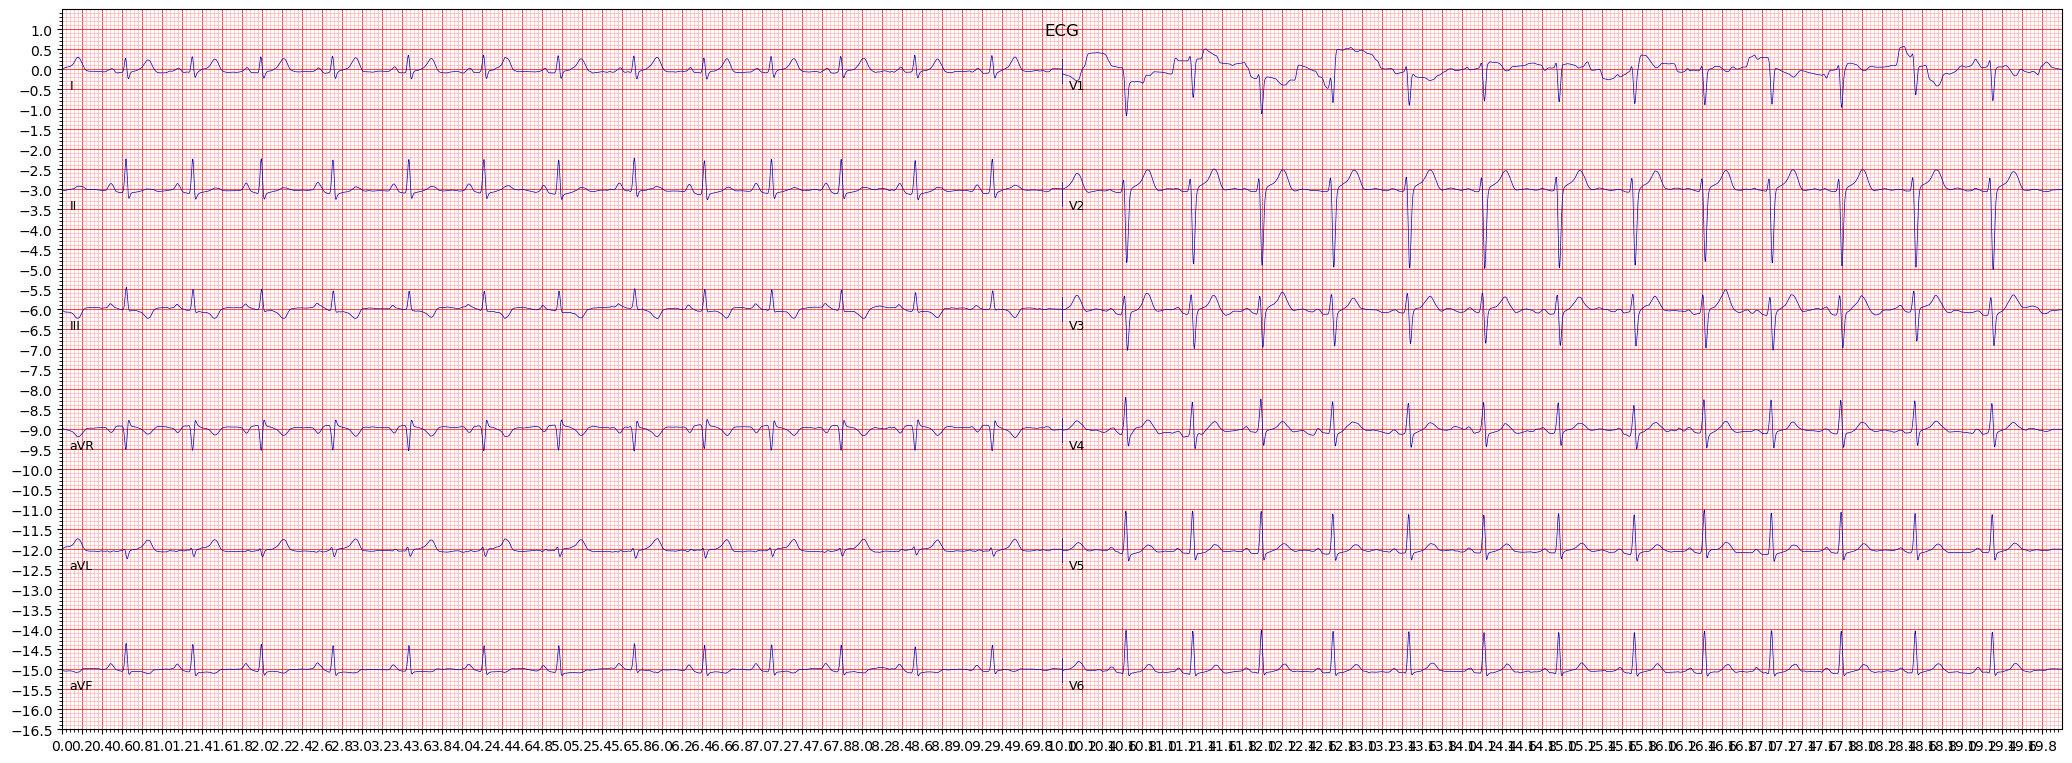

In [13]:
ecg = train_ds.find_ecg_with_diagnosis('NORM', 5)
ecg.show_with_grid()

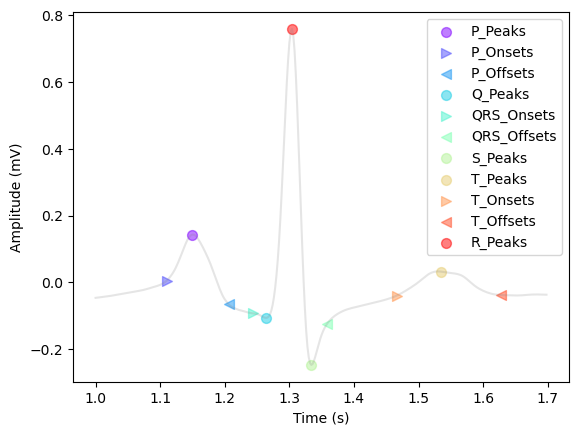

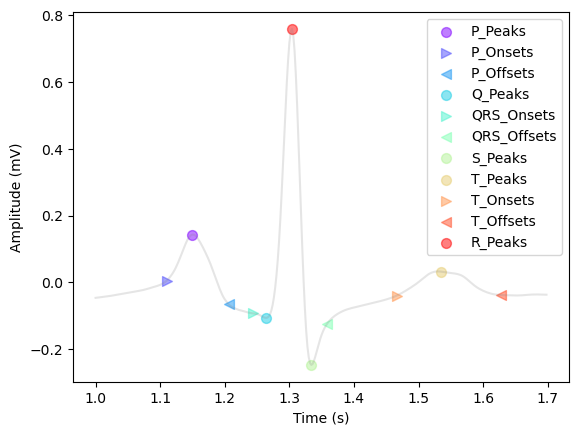

In [16]:
ecg.plot_delineation(lead='II', window_range=(1, 1.7))

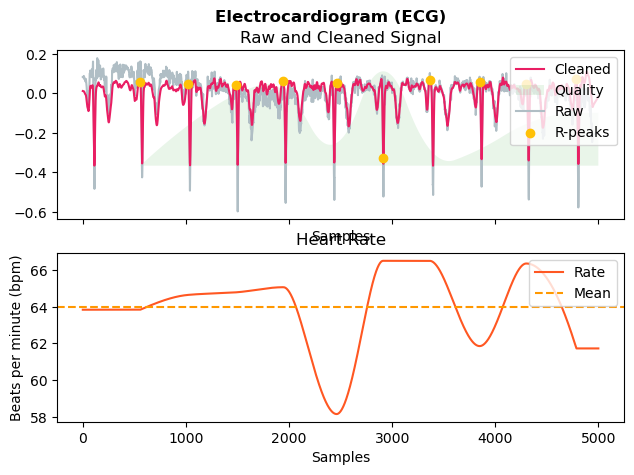

In [9]:
_, _ = ecg.process_and_plot(lead='aVR')

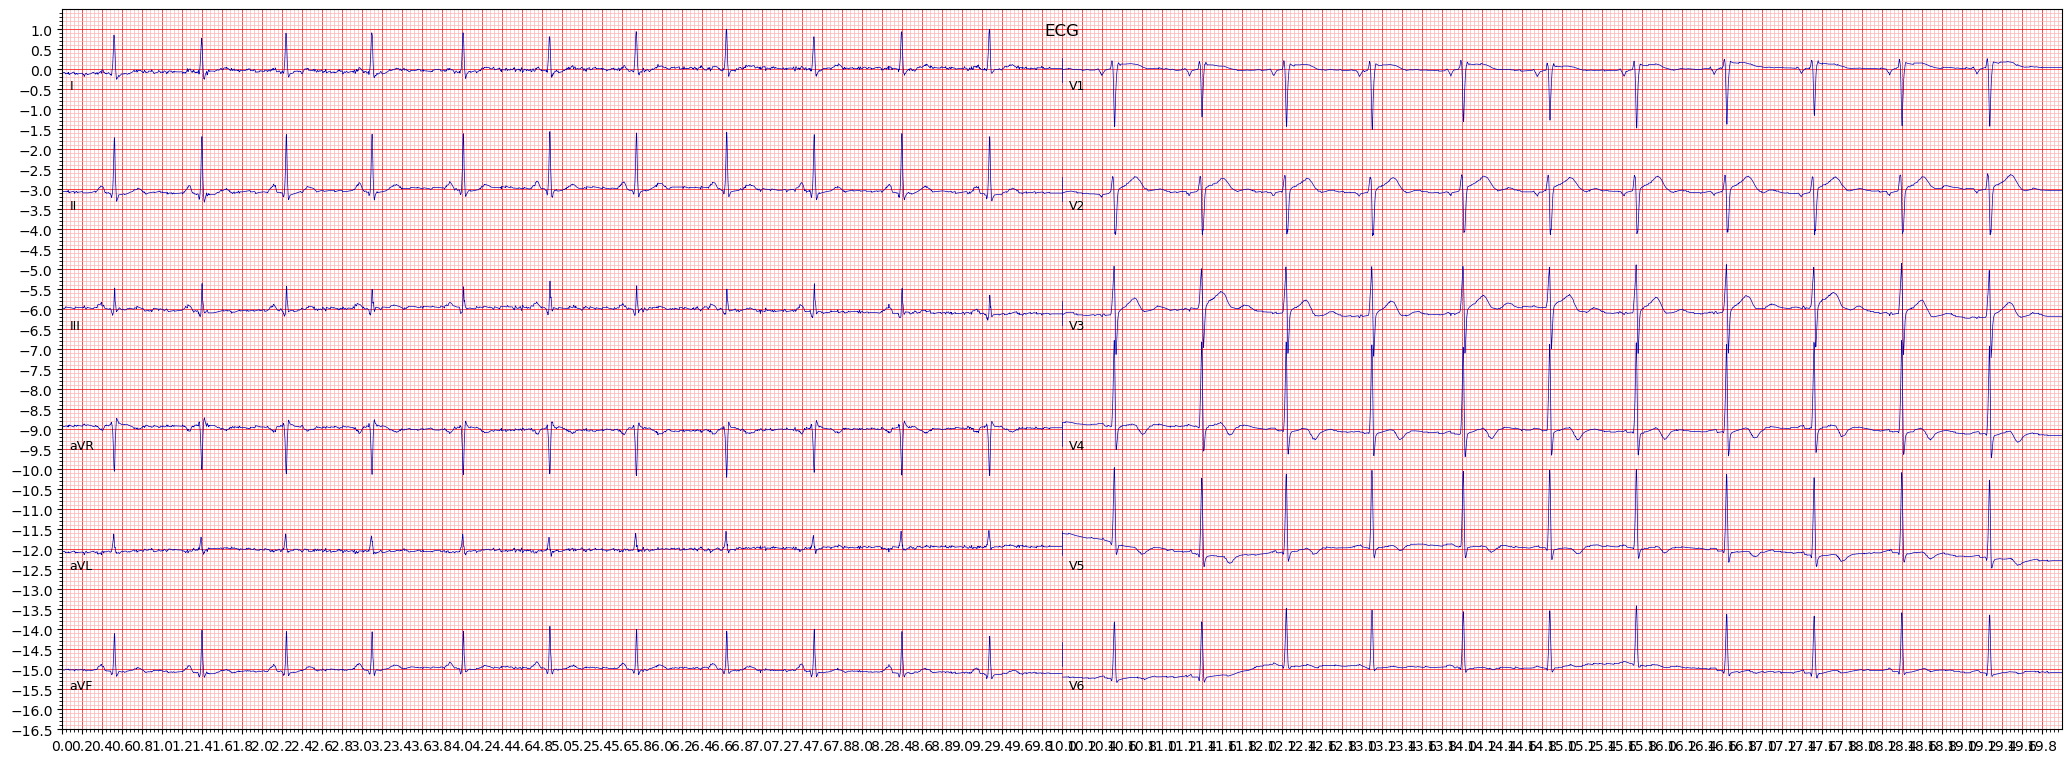

In [27]:
from src.basic.ecg import Ecg
ecg: Ecg = train_ds.find_ecg_with_diagnosis('MI', 18)
ecg.show_with_grid()

In [15]:
ecg.str_diagnoses

['LMI', 'AMI', 'RBBB', 'SR']

In [30]:
from src.utils.ecg_utils import check_all_inverted_waves
check_all_inverted_waves('T', ecg.cleaned, ecg.delineations)

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True])

Delineating ECG signal...


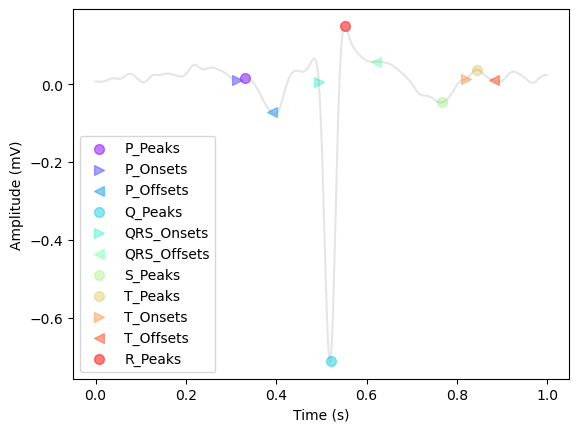

In [34]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='aVR', window_range=(0, 1))

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


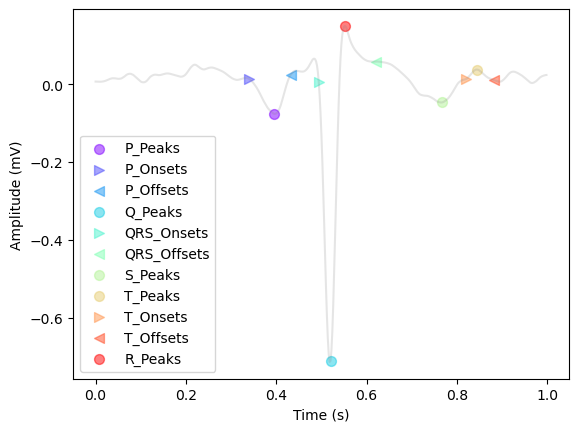

In [35]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='aVR', window_range=(0, 1))

Delineating ECG signal...


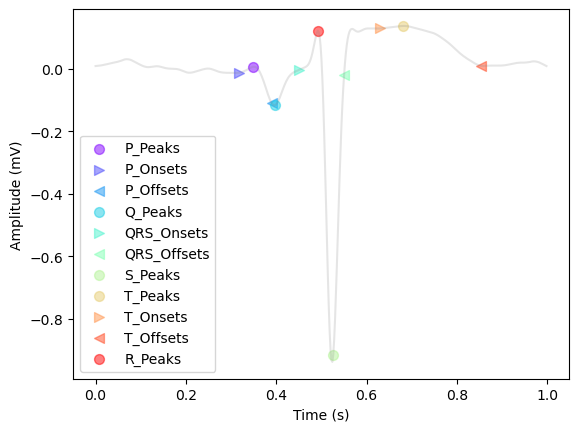

In [36]:
# ecg.delineations = None
ecg.delineate(check_P_inversion=False, check_T_inversion=False)
ecg.plot_delineation(lead='V1', window_range=(0, 1))

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


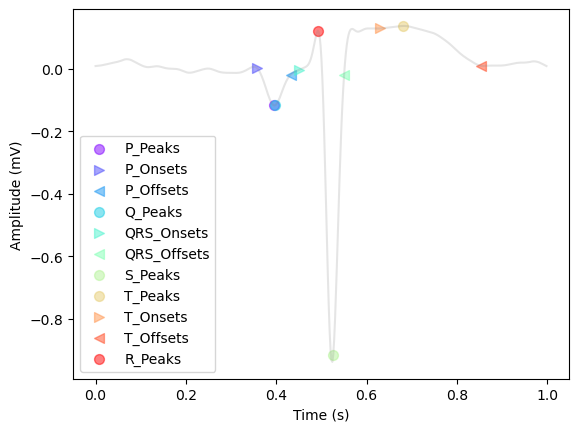

In [37]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V1', window_range=(0, 1))

Delineating ECG signal...


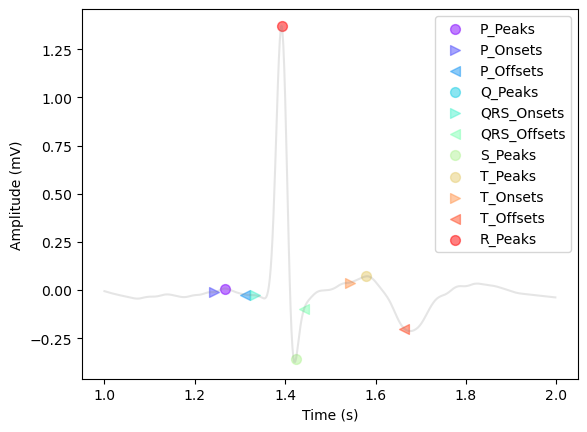

In [38]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='V4', window_range=(1, 2))

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


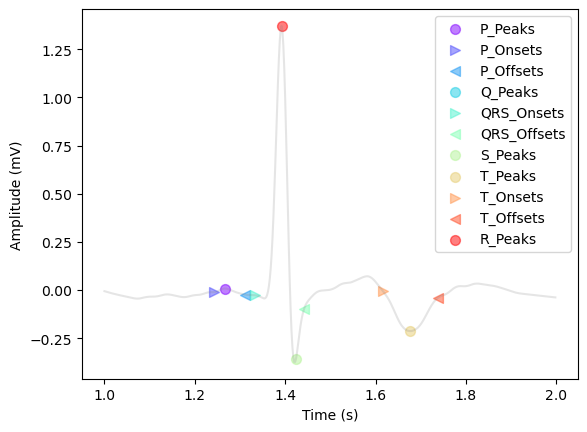

In [39]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V4', window_range=(1, 2))

Delineating ECG signal...


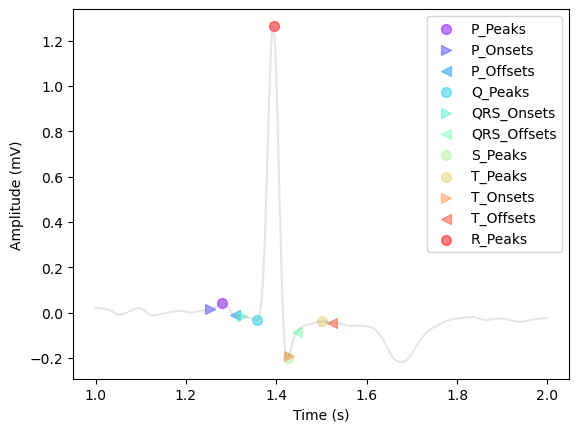

In [40]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='V5', window_range=(1, 2))

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


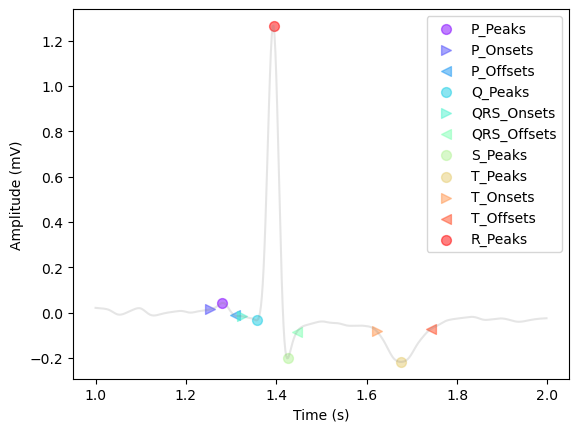

In [41]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V5', window_range=(1, 2))

In [42]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
all_cycles = ecg.get_cycles()
# ecg.all_rpeaks[0].dtype

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
Getting cardiac cycles...


In [44]:
all_cycles[0]

[CardiacCycle(P_onset=178, P_peak=200, P_offset=216, QRS_onset=231, Q_peak=241, R_peak=259, S_peak=277, QRS_offset=297, T_onset=277, T_peak=312, T_offset=324),
 CardiacCycle(P_onset=613, P_peak=635, P_offset=647, QRS_onset=674, Q_peak=671, R_peak=696, S_peak=712, QRS_offset=722, T_onset=803, T_peak=817, T_offset=838),
 CardiacCycle(P_onset=1039, P_peak=1059, P_offset=1075, QRS_onset=1083, Q_peak=1095, R_peak=1118, S_peak=1136, QRS_offset=1146, T_onset=1149, T_peak=1172, T_offset=1197),
 CardiacCycle(P_onset=1467, P_peak=1487, P_offset=1506, QRS_onset=1515, Q_peak=1527, R_peak=1547, S_peak=1565, QRS_offset=1576, T_onset=1566, T_peak=1591, T_offset=1602),
 CardiacCycle(P_onset=1915, P_peak=1934, P_offset=1961, QRS_onset=1971, Q_peak=1981, R_peak=2004, S_peak=2021, QRS_offset=2031, T_onset=2048, T_peak=2060, T_offset=2071),
 CardiacCycle(P_onset=2362, P_peak=2377, P_offset=2397, QRS_onset=2409, Q_peak=2418, R_peak=2436, S_peak=2453, QRS_offset=2466, T_onset=2454, T_peak=2471, T_offset=248

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


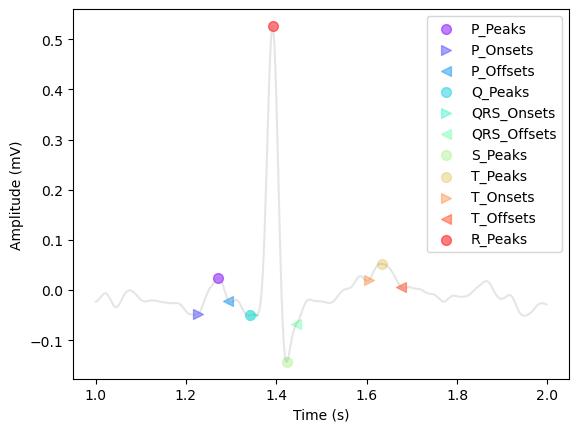

In [45]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='I', window_range=(1, 2))

## Sinus Tachycardia

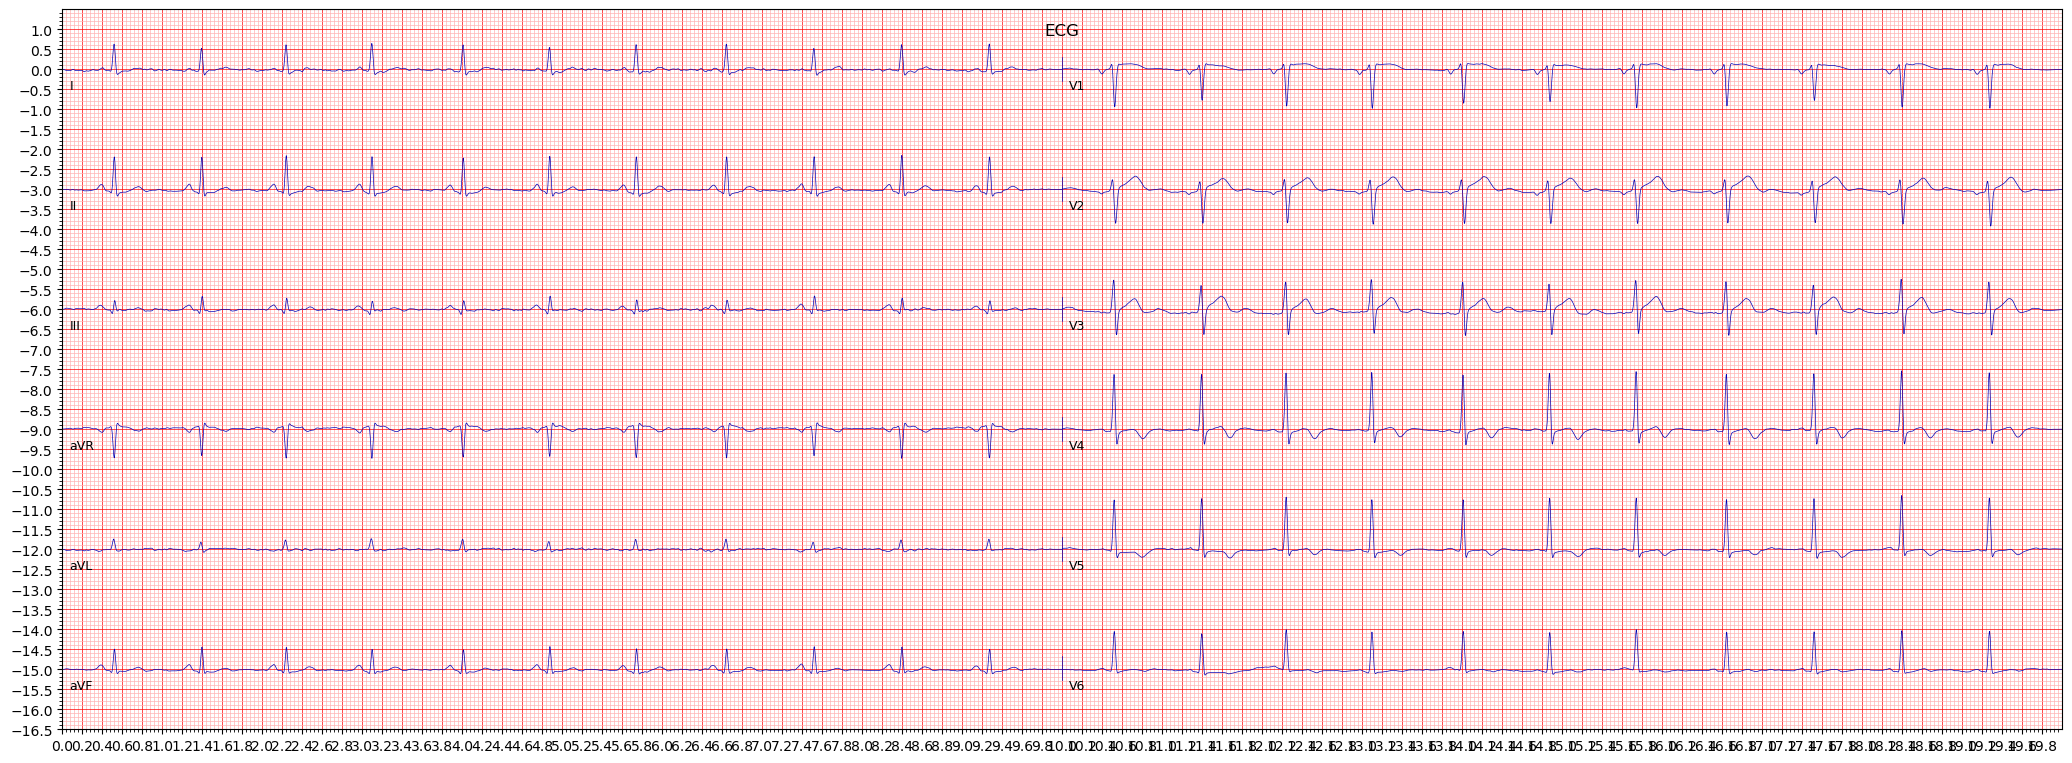

['STACH', 'NORM']


In [232]:
STACH_ecg = train_ds.find_ecg_with_diagnosis('STACH', 50)
ecg.show_with_grid(show_cleaned=True)
print(STACH_ecg.labels)

## Lattice

In [2]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(1, '../../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
from matplotlib import pyplot as plt
import pandas as pd

def scatter_two_agg(path_to_agg: str, x_name, y_name, title=None, xlabel=None, ylabel=None):
    """
        Compare the aggregated mid output via scatter plot
        """
    all_mid_output: pd.DataFrame = pd.read_csv(path_to_agg, header=0, index_col=0)
    fig_path = os.path.splitext(path_to_agg)[0] + '.png'
    # extract column x_name and y_name
    x = all_mid_output.loc[:, x_name]
    y = all_mid_output.loc[:, y_name]
    y = (y - 0.615) * 8
    fig, ax = plt.subplots()
    corr = x.corr(y)
    title = f'{y_name} vs {x_name} (r={corr:.4f})' if not title else title + f' (r={corr:.4f})'
    xlabel = x_name if not xlabel else xlabel
    ylabel = y_name if not ylabel else ylabel
    ax.set_title(f'{y_name} vs {x_name} (r={corr:.4f})')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.scatter(x, y)
    plt.show(fig)
    fig.savefig(fig_path)
    ax.clear()
    plt.close(fig)

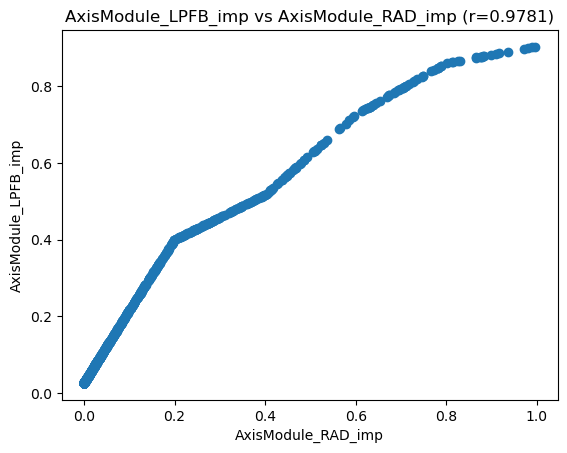

In [13]:
agg_file_path = '/Users/tf/Downloads/HL_mid_output_agg.csv'
scatter_two_agg(agg_file_path, 'AxisModule_RAD_imp', 'AxisModule_LPFB_imp')